# Principal Components Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline  

# Some of these examples/code from: S. Raschka. Python Machine Learning. Packt Publishing Ltd., 2015.

In [4]:
#Load data, subtract mean, etc
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X,y     = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sc      = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.fit_transform(X_test)
print(X_train_std.shape)

(124, 13)


In [5]:
#compute covariance, eigenvals and eigenvecs
cov_mat = np.cov(X_train_std.T)
print(cov_mat)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

[[ 1.00813008  0.09525228  0.34372425 -0.26260262  0.2067756   0.25720182
   0.24147853 -0.10869287  0.15253265  0.4989209  -0.06330994  0.07041129
   0.63871241]
 [ 0.09525228  1.00813008  0.20295138  0.28264911 -0.07387468 -0.3402212
  -0.34686582  0.24293744 -0.18535475  0.22677934 -0.55165917 -0.31556988
  -0.19971748]
 [ 0.34372425  0.20295138  1.00813008  0.46381884  0.31633971  0.16167165
   0.1591875   0.21066989  0.02696469  0.33646003 -0.14234319  0.04347046
   0.30254786]
 [-0.26260262  0.28264911  0.46381884  1.00813008  0.02043051 -0.25519043
  -0.28267277  0.31292338 -0.16871568  0.09128635 -0.31660355 -0.1939533
  -0.38199212]
 [ 0.2067756  -0.07387468  0.31633971  0.02043051  1.00813008  0.1680032
   0.18173535 -0.23296108  0.25429749  0.1477686   0.07006496  0.04803076
   0.38118535]
 [ 0.25720182 -0.3402212   0.16167165 -0.25519043  0.1680032   1.00813008
   0.86857345 -0.4162207   0.59560496 -0.08061932  0.43604332  0.69481101
   0.47932365]
 [ 0.24147853 -0.34686582

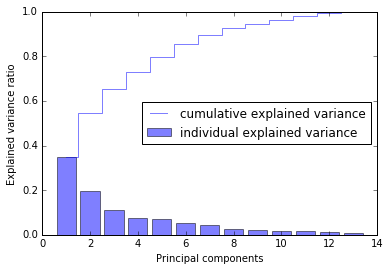

In [6]:
#compute explained variance and plot
tot         = sum(eigen_vals)
var_exp     = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')	
plt.step(range(1,14), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

Matrix W:
 [[-0.13701749  0.45887063]
 [ 0.23611599  0.21470899]
 [-0.01316427  0.43092687]
 [ 0.2114068   0.09381518]
 [-0.13238273  0.27368657]
 [-0.39817414  0.07146833]
 [-0.42685178  0.03131724]
 [ 0.28640357  0.05953044]
 [-0.31233036  0.08781746]
 [ 0.10897442  0.49846998]
 [-0.31714995 -0.26748792]
 [-0.37941516 -0.12923118]
 [-0.29384758  0.34621831]]
[[  4.57798027e+00   6.22202706e-16]
 [  6.22202706e-16   2.55772191e+00]]
(124, 2)


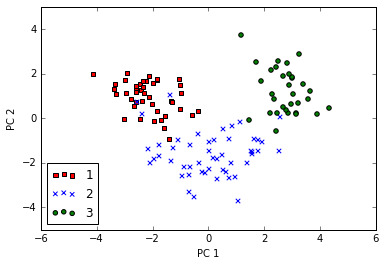

In [7]:
#perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

X_train_pca = X_train_std.dot(w)
cov_mat = np.cov(X_train_pca.T)
print(cov_mat)
print(X_train_pca.shape)
colors = ['r','b','g']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

[[ 5.1938764  -0.05436385]
 [-0.05436385  2.24401424]]


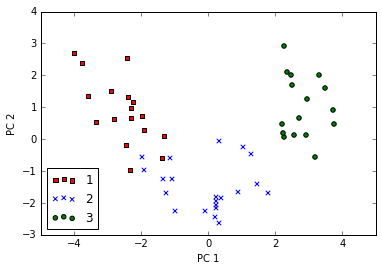

In [8]:
X_test_pca = X_test_std.dot(w)
cov_mat = np.cov(X_test_pca.T)
print(cov_mat)
for l,c,m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test==l,0],X_test_pca[y_test==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Dataset consists of 400 faces


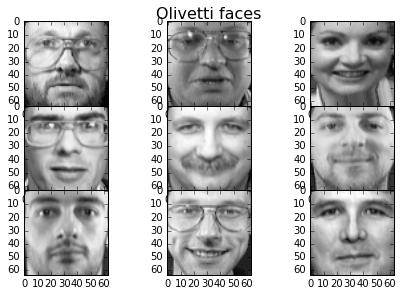

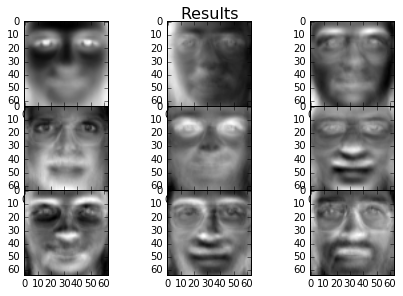

In [9]:
#Eigenfaces
#Part of example from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

#Define function to plot imagery
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure()
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

scikit_pca = PCA(n_components = n_components, whiten=True)
X_spca = scikit_pca.fit_transform(faces.T)

plot_gallery("Olivetti faces", faces[0:n_components,:])
plot_gallery('Results', X_spca.T)


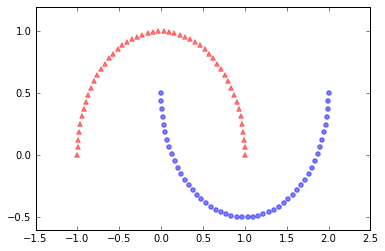

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0, 1], color='red', marker = '^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1, 1], color='blue', marker = 'o', alpha=0.5)
plt.show()

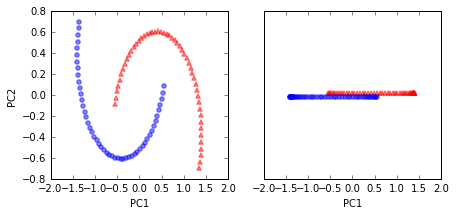

In [11]:
# Apply standard PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker = '^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker = 'o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color='red', marker = '^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()